In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
data = pd.read_csv("campaign_responses.csv")
print(data.head(10))
data.drop('customer_id', axis=1, inplace=True)
numerical_features = data.select_dtypes(include = ['int','float']).columns.to_list()
categorical_features = data.select_dtypes(include = ['category', 'object']).columns.to_list()
print( f"\nTypes of variables" )
print(f"numerical features={numerical_features}")
print(f"categorical features={categorical_features}")

   customer_id  age  gender  annual_income  credit_score employed  \
0            1   35    Male          65000           720      Yes   
1            2   28  Female          45000           680       No   
2            3   42    Male          85000           750      Yes   
3            4   31  Female          55000           710      Yes   
4            5   47    Male          95000           790      Yes   
5            6   25  Female          38000           630       No   
6            7   39    Male          72000           740      Yes   
7            8   33  Female          48000           670      Yes   
8            9   51    Male         110000           820      Yes   
9           10   27  Female          40000           620       No   

  marital_status  no_of_children responded  
0        Married               2       Yes  
1         Single               0        No  
2        Married               3       Yes  
3         Single               1        No  
4        Marrie

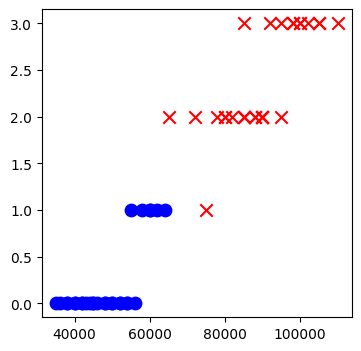

In [39]:
responded_flag = {"Yes": 1, "No": 0 }
X = data.loc[:,[ "annual_income", "no_of_children" ]].values
y = data[ "responded" ].map(responded_flag).astype(int)

positive_response = y == 1
negative_response = y == 0

positive_response = positive_response.values.reshape(-1)
negative_response = negative_response.values.reshape(-1)

fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(X[positive_response,0], X[positive_response, 1], marker='x', s=80, c = 'red')
ax.scatter(X[negative_response,0], X[negative_response, 1], marker='o', s=80, c = 'blue')

In [42]:
positive_response

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [5]:
def sigmoidFunction(linearRegPred):
    e = 1 + np.exp(-1 * linearRegPred)
    return( 1/e )

In [6]:
predictions = model.predict(X)
predictions = sigmoidFunction(predictions)
predictions

sigmoidFunction(0.60324825)

0.6463991025439391

In [51]:
1/(1 + np.exp(-1 * 0.60324825))

0.6463991025439391

In [ ]:
predictions

In [12]:
sigmoidFunction(-10000000)

/tmp/ipykernel_2606/3229596579.py:2: RuntimeWarning: overflow encountered in exp
  e = 1 + np.exp(-1 * linearRegPred)


0.0